<a href="https://colab.research.google.com/github/econ105/AI/blob/main/Python/algotrading/zigzagindicator/frequency_table_GBPUSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1018309302.py:56: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AUDUSD=X', period='5y')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1018309302.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pivots.append((last_pivot_idx, float(last_pivot_price)))
/tmp/ipython-input-1018309302.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pivots.append((last_pivot_idx, float(last_pivot_price)))
/tmp/ipython-input-1018309302.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in

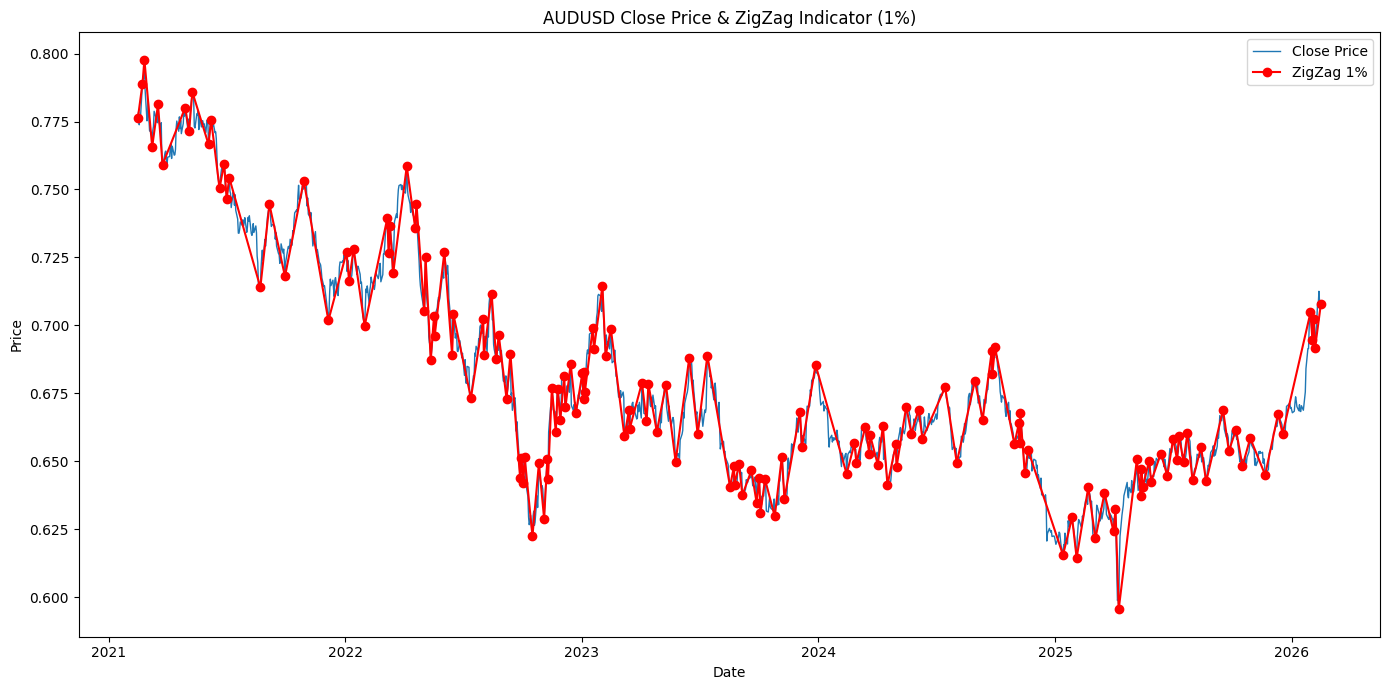

2021-02-15: 0.77641
2021-02-22: 0.78885
2021-02-25: 0.79770
2021-03-09: 0.76567
2021-03-18: 0.78130
2021-03-25: 0.75910
2021-04-29: 0.78013
2021-05-05: 0.77138
2021-05-10: 0.78588
2021-06-04: 0.76658
2021-06-08: 0.77563
2021-06-21: 0.75040
2021-06-28: 0.75950
2021-07-02: 0.74658
2021-07-06: 0.75430
2021-08-23: 0.71398
2021-09-06: 0.74450
2021-09-30: 0.71800
2021-10-29: 0.75316
2021-12-06: 0.70179
2022-01-03: 0.72682
2022-01-07: 0.71626
2022-01-14: 0.72823
2022-01-31: 0.69980
2022-03-07: 0.73948
2022-03-09: 0.72679
2022-03-11: 0.73660
2022-03-16: 0.71910
2022-04-06: 0.75857
2022-04-19: 0.73576
2022-04-21: 0.74470
2022-05-03: 0.70510
2022-05-05: 0.72529
2022-05-13: 0.68719
2022-05-18: 0.70328
2022-05-19: 0.69590
2022-06-03: 0.72690
2022-06-15: 0.68899
2022-06-17: 0.70405
2022-07-14: 0.67323
2022-08-02: 0.70239
2022-08-03: 0.68903
2022-08-15: 0.71167
2022-08-22: 0.68771
2022-08-26: 0.69640
2022-09-07: 0.67301
2022-09-13: 0.68940
2022-09-28: 0.64380
2022-09-30: 0.65130
2022-10-03: 0.64210


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def zigzag(price, threshold):
    pivots = []
    if len(price) < 2:
        return pivots

    last_pivot_idx = 0
    last_pivot_price = price[0]
    pivots.append((last_pivot_idx, float(last_pivot_price)))

    direction = None  # None, 'up', 'down'
    candidate_idx = last_pivot_idx
    candidate_price = last_pivot_price

    for i in range(1, len(price)):
        percent_move = (price[i] - last_pivot_price) / last_pivot_price * 100
        if direction is None:
            if abs(percent_move) >= threshold:
                direction = 'up' if percent_move > 0 else 'down'
                last_pivot_idx = i
                last_pivot_price = price[i]
                pivots.append((last_pivot_idx, float(last_pivot_price)))
                candidate_idx = last_pivot_idx
                candidate_price = last_pivot_price
        else:
            if direction == 'up':
                if price[i] > candidate_price:
                    candidate_idx = i
                    candidate_price = price[i]
                elif price[i] < candidate_price * (1 - threshold / 100):
                    pivots.append((candidate_idx, float(candidate_price)))
                    direction = 'down'
                    last_pivot_idx = i
                    last_pivot_price = price[i]
                    candidate_idx = last_pivot_idx
                    candidate_price = last_pivot_price
            elif direction == 'down':
                if price[i] < candidate_price:
                    candidate_idx = i
                    candidate_price = price[i]
                elif price[i] > candidate_price * (1 + threshold / 100):
                    pivots.append((candidate_idx, float(candidate_price)))
                    direction = 'up'
                    last_pivot_idx = i
                    last_pivot_price = price[i]
                    candidate_idx = last_pivot_idx
                    candidate_price = last_pivot_price
    if pivots and pivots[-1][0] != len(price)-1:
        pivots.append((len(price)-1, float(price[-1])))
    return pivots

# Download GBPUSD data for 1 year
df = yf.download('AUDUSD=X', period='5y')
close_prices = df['Close'].values
dates = df.index

# Calculate ZigZag pivots
threshold = 1  # You can change this value as desired
zigzag_points = zigzag(close_prices, threshold)
zigzag_idx, zigzag_prices = zip(*zigzag_points)

# Plot Close Price and ZigZag indicator
plt.figure(figsize=(14,7))
plt.plot(dates, close_prices, label='Close Price', linewidth=1)
plt.plot(dates[list(zigzag_idx)], zigzag_prices, 'ro-', label=f'ZigZag {threshold}%')
plt.title(f'AUDUSD Close Price & ZigZag Indicator ({threshold}%)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Print ZigZag pivots (date and price)
for idx, price in zip(zigzag_idx, zigzag_prices):
    print(f'{dates[idx].strftime("%Y-%m-%d")}: {price:.5f}')


In [2]:
import pandas as pd
import numpy as np

# zigzag_idx, zigzag_prices must be generated from the previous ZigZag code

# Calculate ZigZag swing sizes in pips
zigzag_pips = [abs(zigzag_prices[i+1] - zigzag_prices[i]) / 0.0001 for i in range(len(zigzag_prices)-1)]

# Define bins (0–50, 51–100, ..., up to the max pip size)
bin_edges = np.arange(0, max(zigzag_pips) + 50, 50)
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

# Bin the pip sizes and count frequencies
binned = pd.cut(zigzag_pips, bins=bin_edges, right=True, labels=bin_labels, include_lowest=True)
freq_table = pd.value_counts(binned, sort=False)

# Output the frequency table
freq_table = freq_table.reset_index().rename(columns={'index': 'Pip Range', 0: 'Frequency'})
print(freq_table.to_string(index=False))


Pip Range  count
     0-50      0
   50-100     45
  100-150     43
  150-200     21
  200-250     16
  250-300     15
  300-350      8
  350-400     11
  400-450      3
  450-500      2
  500-550      1
  550-600      1


/tmp/ipython-input-188240415.py:15: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_table = pd.value_counts(binned, sort=False)
